In [153]:
import matplotlib.pyplot as plt
from sklearn import linear_model # usando sklear para saber los valores optimos
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [154]:
RLogistica = pd.read_csv("C:/RLOGISTICA/framingham.csv", sep=",")

In [155]:
RLogistica

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [156]:
# Exploración de datos
RLogistica[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI']].head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10


<Axes: xlabel='totChol', ylabel='male'>

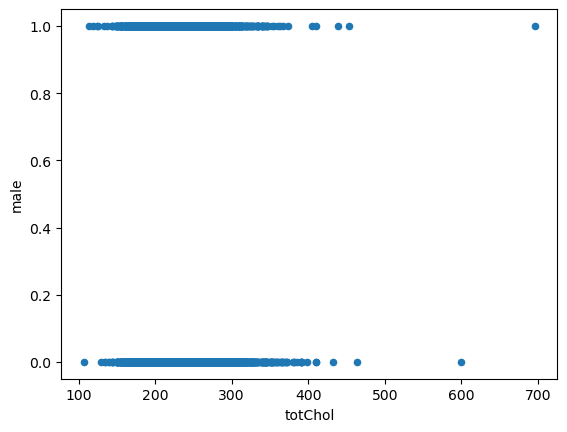

In [157]:
# Gráfica de puntos de los datos (Colesterol total, mujer 0 hombre), Colesterol total
RLogistica[['male','totChol']].plot.scatter(x="totChol", y="male")

In [158]:
# Pruebas de parametros
w = 0.009
b = -4

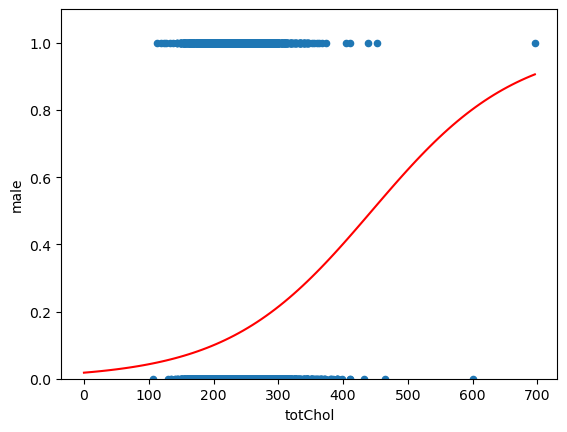

In [159]:
# Puntos de la recta
x = np.linspace(0,RLogistica["totChol"].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
RLogistica.plot.scatter(x='totChol',y='male')
plt.plot(x, y, '-r')
plt.ylim(0,RLogistica['male'].max()*1.1)
# plt.grid()
plt.show()

In [160]:
# calculo de las predicciones
RLogistica['sigmoid'] = 1/(1+np.exp(-(RLogistica['totChol']*w+b)))

# calculo de la funcion de error
RLogistica['loss_xi'] = -RLogistica['male']*np.log(RLogistica['sigmoid'])-(1-RLogistica['male'])*np.log(1-RLogistica['sigmoid'])
cost_j = RLogistica['loss_xi'].mean()
cost_j

0.9763718582198913

In [162]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [163]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [164]:
# Función de Costos
def sum_error_df(df):
    RLogistica['sigmoid'] = 1/(1+np.exp(-(RLogistica['totChol']*df['w']+df['b'])))
    RLogistica['loss_xi'] = -RLogistica['male']*np.log(RLogistica['sigmoid'])-(1-RLogistica['male'])*np.log(1-RLogistica['sigmoid'])
    j_cost = RLogistica['loss_xi'].mean()
    return(j_cost)

In [167]:
df['error'] = df.apply(sum_error_df, axis=1)

C:\Users\JOSE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [175]:
# Data Frame actualizado con errores de menor a mayor
df.sort_values(by=['error']).head()

,w,b,error
0,0.05,-4.00,4.525731
1,0.05,-3.99,4.531381
2,0.05,-3.98,4.537031
3,0.05,-3.97,4.542681
4,0.05,-3.96,4.548332


In [176]:
# Visualizacion de data frame en filas y columnas
df_3d = df.pivot(index='w', columns='b', values='error')

In [177]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,4.525731,4.531381,4.537031,4.542681,4.548332,4.553983,4.559634,4.565285,4.570937,4.576588,...,5.034928,5.040592,5.046256,5.051920,5.057584,5.063248,5.068912,5.074576,5.080241,5.085905
0.06,5.883742,5.889415,5.895083,5.900755,5.906423,5.912095,5.917763,5.923436,5.929104,5.934777,...,6.394204,6.399874,6.405545,6.411215,6.416896,6.422567,6.428238,6.433908,6.439590,6.445261
0.07,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
0.08,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
0.09,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


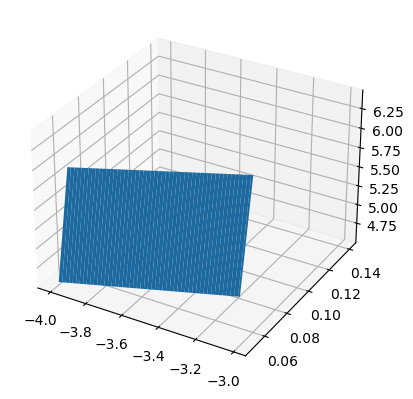

In [180]:
# Grafica en 3D
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

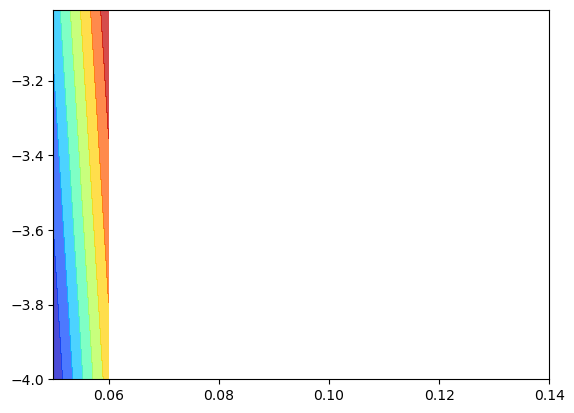

In [179]:
# Mapa de Contorno
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)